<a href="https://colab.research.google.com/github/shamsakhoja7-max/msba-portfolio-shamsakhoja/blob/main/TRU_SOURCE_DATA_PROCESSSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

telco_df1 = pd.read_excel('/content/drive/MyDrive/Class - PA/retentiondata_case.xlsx')

Mounted at /content/drive


In [4]:
telco_df1.shape

(5636, 36)

In [5]:
telco_df1.describe()

,tenure_mo,monthly_fee,total_billed,age_years,dependents_count,referrals_count,avg_long_dist_fee,avg_gb_download,refunds_total,extra_data_fees_total,long_dist_fees_total
count,5636.000000,5636.000000,5628.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.00000,5636.000000
mean,32.445174,64.784031,2289.864792,46.680092,0.464869,1.956707,22.820859,20.400994,1.894514,7.01384,742.065994
std,24.515986,30.064922,2265.570570,16.754494,0.958041,3.012469,15.492059,20.252829,7.766096,25.48080,837.789207
min,0.000000,18.250000,18.800000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,9.000000,35.750000,405.287500,33.000000,0.000000,0.000000,8.950000,4.000000,0.000000,0.00000,67.695000
50%,29.000000,70.300000,1412.150000,46.000000,0.000000,0.000000,22.590000,17.000000,0.000000,0.00000,400.390000
75%,55.000000,89.900000,3808.212500,60.000000,0.000000,3.000000,36.322500,27.000000,0.000000,0.00000,1187.370000
max,72.000000,118.750000,8684.800000,80.000000,9.000000,11.000000,49.990000,85.000000,49.790000,150.00000,3564.720000


In [6]:
# check target variable distribution
telco_df1['left_flag'].value_counts(normalize=True)


,proportion
left_flag,
No,0.734564
Yes,0.265436


In [7]:
# Droping identifier variables
cols_to_drop = ["acct_ref", "cust_ref"]

telco_df1 = telco_df1.drop(
    columns=[c for c in cols_to_drop if c in telco_df1.columns]
)


In [8]:
# Identify zero-variance columns
zero_var_cols = [
    col for col in telco_df1.columns
    if telco_df1[col].nunique(dropna=False) == 1
]

zero_var_cols


['fiscal_qtr']

In [9]:
#Drop zero variance columns and check shape
telco_df1 = telco_df1.drop(columns=zero_var_cols)

telco_df1.shape


(5636, 33)

In [10]:
# Calculate percentage of missing values per column
missing_pct = (
    telco_df1.isna()
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
)


missing_pct[missing_pct > 0]


,0
recent_offer,55.11
internet_tech,21.50
total_billed,0.14


In [11]:
# Replace missing internet tech with "Unknown"
if "internet_tech" in telco_df1.columns:
    telco_df1["internet_tech"] = telco_df1["internet_tech"].fillna("Unknown")

# Replace missing recent offer with "No Offer"
if "recent_offer" in telco_df1.columns:
    telco_df1["recent_offer"] = telco_df1["recent_offer"].fillna("No Offer")

#Quick check
telco_df1[["internet_tech", "recent_offer"]].isna().sum()


,0
internet_tech,0
recent_offer,0


#small edit 1
changing imputation for numeric columns

In [12]:
#impute missing values in total_billed with zero

#cols = ["total_billed"]
#telco_df1[cols] = telco_df1[cols].fillna(0)


cols = ["total_billed"]
telco_df1[cols] = telco_df1[cols].fillna(telco_df1[cols].median())

In [13]:
# Identify categorical columns
cat_cols = telco_df1.select_dtypes(include=["object"]).columns.tolist()

cat_cols


['has_dependents',
 'home_phone',
 'multi_line',
 'internet_plan',
 'add_on_security',
 'add_on_backup',
 'add_on_protection',
 'tech_support_std',
 'stream_tv',
 'stream_movies',
 'contract_term',
 'e_bill_opt_in',
 'pay_method',
 'left_flag',
 'gender',
 'is_married',
 'referred_friend',
 'recent_offer',
 'internet_tech',
 'premium_support',
 'stream_music',
 'unlimited_data_opt']

In [14]:
# Safely one-hot encode selected categorical columns


#encode_cols = [
    #col for col in ["pay_method", "internet_tech", "recent_offer", "contract_term", "gender","multi_line", "internet_plan"]
    #if col in telco_df1.columns
#]

#telco_df1 = pd.get_dummies(
    #telco_df1,
    #columns=encode_cols,
    #drop_first=False   # keep all categories
#)

# Quick check
#telco_df1.shape


In [15]:
# Ensure all one-hot encoded columns are integers 1 & 0

# Identify columns that contain ONLY TRUE / FALSE (uppercase)
#true_false_cols = [
    #col for col in telco_df1.columns
    #if set(telco_df1[col].dropna().unique()).issubset({"TRUE", "FALSE"})
#]

# Convert ONLY those columns to 1 / 0
#telco_df1[true_false_cols] = (
    #telco_df1[true_false_cols]
    #.replace({"TRUE": 1, "FALSE": 0})
    #.astype(int)
#)

# Quick verification
#true_false_cols


In [16]:
#Evaluating Add-ons
import pandas as pd

addon_cols = [
    "add_on_backup",
    "add_on_protection",
    "add_on_security",
    "premium_support",
    "tech_support_std",
    "unlimited_data_opt"
]

# 1) Create numeric churn flag (1 = churned)
telco_df1["churn_flag"] = (telco_df1["left_flag"].astype(str).str.strip().str.lower() == "yes").astype(int)

# 2) Long format for add-ons
churn_long = telco_df1.melt(
    id_vars="churn_flag",
    value_vars=[c for c in addon_cols if c in telco_df1.columns],
    var_name="add_on",
    value_name="add_on_status"
)

# 3) Pivot: churn % by add-on status
addon_pivot = (
    churn_long
    .groupby(["add_on", "add_on_status"])["churn_flag"]
    .mean()
    .mul(100)
    .unstack()
    .round(2)
)

# 4) Drop "No internet service" column if it exists
if "No internet service" in addon_pivot.columns:
    addon_pivot = addon_pivot.drop(columns="No internet service")

# 5) Add difference column (No - Yes)
addon_pivot["churn_pct_diff"] = (addon_pivot["No"] - addon_pivot["Yes"]).round(2)

addon_pivot


add_on_status,No,Yes,churn_pct_diff
add_on,,,
add_on_backup,39.53,21.89,17.64
add_on_protection,39.37,22.10,17.27
add_on_security,41.76,14.63,27.13
premium_support,31.28,15.12,16.16
tech_support_std,41.65,15.12,26.53
unlimited_data_opt,16.05,31.57,-15.52


In [17]:
# Aggregate Support and Security Add-ons except unlimited data add on

addon_cols = [
    "add_on_backup",
    "add_on_protection",
    "premium_support",
    "add_on_security",
    "tech_support_std"
]

telco_df1["num_add_ons"] = (
    telco_df1[addon_cols]
    .apply(lambda x: (x == "Yes").sum(), axis=1)
)



In [18]:
# Create col 'has add on' indicating customer has support or security add ons

telco_df1["has_add_on"] = (telco_df1[addon_cols] == "Yes").any(axis=1).astype(int)


In [19]:
# create streaming service aggregation col

stream_cols = [
    "stream_tv",
    "stream_movies",
    "stream_music"
]

telco_df1["has_streaming"] = (telco_df1[stream_cols] == "Yes").any(axis=1).astype(int)


In [20]:
# create referring behavior aggregation col

telco_df1["is_referrer"] = (
    (telco_df1["referred_friend"] == "Yes") | (telco_df1["referrals_count"] > 0)
).astype(int)


In [21]:
# Dropping Columns used to create aggregated features
cols_to_drop = [
    # Add-ons (used in num_add_ons / has_add_on)
    "add_on_backup",
    "add_on_protection",
    "add_on_security",
    "premium_support",
    "tech_support_std",

    # Streaming (used in has_streaming)
    "stream_tv",
    "stream_movies",
    "stream_music",

    # Referral (used in is_referrer)
    "referred_friend",
    "referrals_count",
    "internet_plan",
    "dependents_count",
    "churn_flag",
    "monthly_extra_fee_burden"

]

# Drop only if columns exist
telco_df1 = telco_df1.drop(
    columns=[c for c in cols_to_drop if c in telco_df1.columns]
)


In [22]:
# Create binary refund flag
telco_df1["received_refund"] = (
    telco_df1["refunds_total"] > 0
).astype(int)

# Drop original refunds_total column
telco_df1 = telco_df1.drop(columns=["refunds_total"])


In [23]:

# --- 1. Overage Ratio: proportion of monthly bill from extra fees (SAFE) ---


# 1. Calculate Monthly Extra Fee Burden
# Formula: (Long Dist + Extra Data) / Tenure
telco_df1['monthly_extra_fee_burden'] = (telco_df1['long_dist_fees_total'] + telco_df1['extra_data_fees_total']) / telco_df1['tenure_mo']

# 2. Calculate Burden Ratio
# Formula: Monthly Extra Fee Burden / Monthly Base Fee
telco_df1['overage_ratio'] = telco_df1['monthly_extra_fee_burden'] / telco_df1['monthly_fee']


#telco_df1["overage_ratio"] = (
    #telco_df1["extra_data_fees_total"]
    #+ np.where(
        #telco_df1["tenure_mo"] > 0,
        #telco_df1["long_dist_fees_total"] / telco_df1["tenure_mo"],
        #0  # if tenure == 0, per-month long distance is defined as 0
    #)
#) / (telco_df1["monthly_fee"] + 1e-6)

# Final guardrail
telco_df1["overage_ratio"] = (
    telco_df1["overage_ratio"]
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
)

# 2. Unexpected Cost Burden: How much of the total lifetime spend was 'extra' fees
# This highlights customers who have historically dealt with a lot of overages
telco_df1['unexpected_cost_burden'] = (telco_df1['extra_data_fees_total'] + telco_df1['long_dist_fees_total']) / (telco_df1['total_billed'] + 1e-6)



In [24]:
telco_df1 = telco_df1.drop(columns=['monthly_extra_fee_burden'])

In [25]:
telco_df1.shape

(5636, 27)

In [26]:
telco_df1.to_excel('churn_df_data_2.xlsx', index=False)

In [27]:

num_df = telco_df1.select_dtypes(include=["number"])

np.isinf(num_df).sum().sum()

num_df = telco_df1.select_dtypes(include="number")

inf_by_col = np.isinf(num_df).sum().sort_values(ascending=False)

inf_by_col[inf_by_col > 0]

,0


In [28]:
# Identify categorical columns
cat_cols = telco_df1.select_dtypes(include=["object"]).columns.tolist()

cat_cols


['has_dependents',
 'home_phone',
 'multi_line',
 'contract_term',
 'e_bill_opt_in',
 'pay_method',
 'left_flag',
 'gender',
 'is_married',
 'recent_offer',
 'internet_tech',
 'unlimited_data_opt']

In [29]:
#Safely one-hot encode selected categorical columns


#encode_cols = [
  #  col for col in ["pay_method", "internet_tech", "recent_offer", "contract_term", "gender","multi_line"]
   # if col in telco_df1.columns
#]

#telco_df1 = pd.get_dummies(
    #telco_df1,
    #columns=encode_cols,
    #drop_first=False   # keep all categories
#)

#Quick check
#telco_df1.shape


In [30]:
# Dropping Columns one -hot coded columns
#cols_to_drop = ["pay_method", "internet_tech", "recent_offer", "contract_term", "gender","multi_line"]




# Drop only if columns exist
#telco_df1 = telco_df1.drop(
    #columns=[c for c in cols_to_drop if c in telco_df1.columns]
#)


In [31]:
# Encode everything EXCEPT the response variable 'left_flag'

#response_col = "left_flag"

# 1. Convert boolean dtype columns (True/False) to 1/0
#bool_cols = [
    #col for col in telco_df1.select_dtypes(include="bool").columns
    #if col != response_col
#]

#telco_df1[bool_cols] = telco_df1[bool_cols].astype(int)

# 2. Convert binary Yes/No and TRUE/FALSE STRING columns to 1/0
#binary_string_cols = [
    #col for col in telco_df1.select_dtypes(include=["object", "string"]).columns
    #if col != response_col
    #and set(telco_df1[col].dropna().unique()).issubset(
       # {"Yes", "No", "TRUE", "FALSE"}
    #)
#]

#telco_df1[binary_string_cols] = (
 #   telco_df1[binary_string_cols]
  #  .replace({
   #     "Yes": 1, "No": 0,
    #    "TRUE": 1, "FALSE": 0
    #})
    #.astype(int)
#)

# 3. FINAL SAFETY CHECK (response variable may still appear here, which is OK)
#[col for col in telco_df1.select_dtypes(include=["object", "string"]).columns if col != response_col]

In [32]:
#import numpy as np

#num_df = telco_df1.select_dtypes(include=["number"])

#np.isinf(num_df).sum().sum()

#num_df = telco_df1.select_dtypes(include="number")

#inf_by_col = np.isinf(num_df).sum().sort_values(ascending=False)

#inf_by_col[inf_by_col > 0]


In [33]:

#num_df = telco_df1.select_dtypes(include="number")

#inf_by_col = np.isinf(num_df).sum().sort_values(ascending=False)
#inf_by_col[inf_by_col > 0]

In [34]:
#telco_df1.to_excel('churn_df_data_2_numeric.xlsx', index=False)

<Figure size 640x480 with 0 Axes>

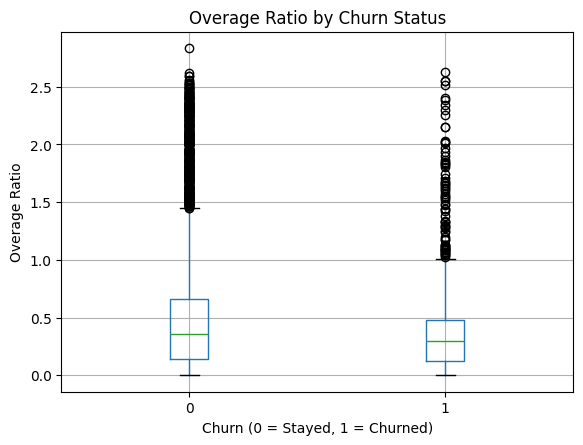

In [35]:
import matplotlib.pyplot as plt

# Clean and convert churn flag to 0/1 (robust to messy values)
telco_df1["left_flag"] = (
    telco_df1["left_flag"]
    .astype(str)
    .str.lower()
    .isin(["1", "yes", "true", "churned"])
    .astype(int)
)

# Boxplot: Overage Ratio by Churn
plt.figure()
telco_df1.boxplot(
    column="overage_ratio",
    by="left_flag"
)

plt.title("Overage Ratio by Churn Status")
plt.suptitle("")
plt.xlabel("Churn (0 = Stayed, 1 = Churned)")
plt.ylabel("Overage Ratio")
plt.show()



Churned customers show a slightly higher concentration of overage ratios in the mid-range, indicating unexpected charges increase churn risk, but the large overlap in distributions means overage alone is not a strong standalone predictor of churn.

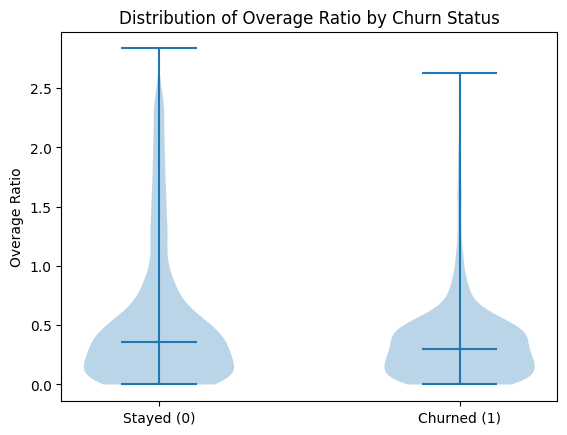

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.violinplot(
    [telco_df1.loc[telco_df1["left_flag"] == 0, "overage_ratio"],
     telco_df1.loc[telco_df1["left_flag"] == 1, "overage_ratio"]],
    showmedians=True
)

plt.xticks([1, 2], ["Stayed (0)", "Churned (1)"])
plt.title("Distribution of Overage Ratio by Churn Status")
plt.ylabel("Overage Ratio")
plt.show()


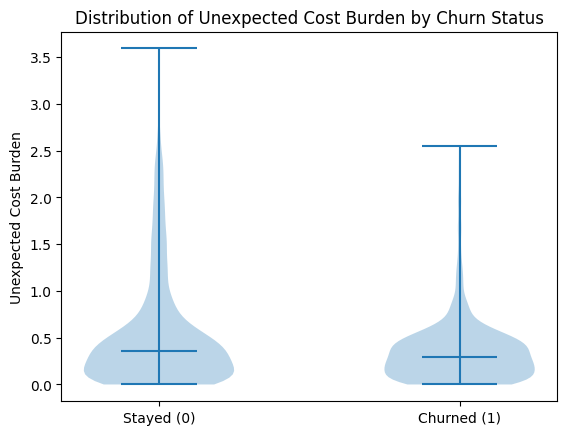

In [37]:
import matplotlib.pyplot as plt

# Violin plot: Unexpected Cost Burden by Churn Status
plt.figure()
plt.violinplot(
    [
        telco_df1.loc[telco_df1["left_flag"] == 0, "unexpected_cost_burden"],
        telco_df1.loc[telco_df1["left_flag"] == 1, "unexpected_cost_burden"]
    ],
    showmedians=True
)

plt.xticks([1, 2], ["Stayed (0)", "Churned (1)"])
plt.title("Distribution of Unexpected Cost Burden by Churn Status")
plt.ylabel("Unexpected Cost Burden")
plt.show()
